In [13]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [14]:
library(tidyverse)
library(lubridate)
library(forcats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



# Lecture 15: More on factors & dates

## Trump Twitter data
We will now use what we have learned in the past two classes to analyze some real data. 

In [15]:
load("tt.RData")  # see tt/load_tweets.ipynb for code that produces this data.

In [16]:
print(trump_tweets)

# A tibble: 41,958 x 8
   source id_str text  created_at retweet_count in_reply_to_use… favorite_count
   <chr>  <chr>  <chr> <chr>              <int> <chr>                     <int>
 1 Twitt… 20595… WIsh… Thu Dec 3…           144 <NA>                         42
 2 Twitt… 17979… Wish… Thu Dec 2…           109 <NA>                         55
 3 Twitt… 15413… Don'… Thu Dec 1…           112 <NA>                         20
 4 Twitt… 14785… I'll… Tue Dec 1…           250 <NA>                         37
 5 Twitt… 14359… ...T… Mon Dec 1…            12 <NA>                          6
 6 Twitt… 14358… Thos… Mon Dec 1…            14 <NA>                          6
 7 Twitt… 14356… "All… Mon Dec 1…            24 <NA>                          8
 8 Twitt… 13242… Cong… Fri Dec 1…            44 <NA>                         12
 9 Twitt… 12960… Toni… Thu Dec 0…            55 <NA>                          7
10 Twitt… 10355… Toni… Thu Dec 0…            24 <NA>                          3
# … with 41,948 m

`trump_tweets` is a dataset of all ~~37,169~~ 41,958 Tweets that Donald Trump has sent since 2010.

In [17]:
# print(trump_tweets)
trump_tweets$created_at[1]

[1] "Thu Dec 30 21:42:01 +0000 2010"

### Task #1
Each tweet has a timestamp in the `created_at` column. We want to convert this column to a proper date-time object so that we can analyze the time component of these tweets.

In [7]:
trump_tweets2 <- trump_tweets %>% mutate(
    dt=str_replace(created_at,
    "\\w+ (\\w+ \\d+) ([\\d:]+) \\+0000 (\\d{4})",
    "\\1 \\3 \\2") %>% mdy_hms) %>% print

# A tibble: 37,169 x 9
   source id_str text  created_at retweet_count in_reply_to_use… favorite_count
   <chr>  <chr>  <chr> <chr>              <int> <chr>                     <int>
 1 Twitt… 20595… WIsh… Thu Dec 3…           144 <NA>                         42
 2 Twitt… 17979… Wish… Thu Dec 2…           109 <NA>                         55
 3 Twitt… 15413… Don'… Thu Dec 1…           112 <NA>                         20
 4 Twitt… 14785… I'll… Tue Dec 1…           250 <NA>                         37
 5 Twitt… 14359… ...T… Mon Dec 1…            12 <NA>                          6
 6 Twitt… 14358… Thos… Mon Dec 1…            14 <NA>                          6
 7 Twitt… 14356… "All… Mon Dec 1…            24 <NA>                          8
 8 Twitt… 13242… Cong… Fri Dec 1…            44 <NA>                         12
 9 Twitt… 12960… Toni… Thu Dec 0…            55 <NA>                          7
10 Twitt… 10355… Toni… Thu Dec 0…            24 <NA>                          3
# ... with 37,159

### Task #2
Plot the number of Tweets that Donald Trump has made for each quarter of the year from 2010 to present.
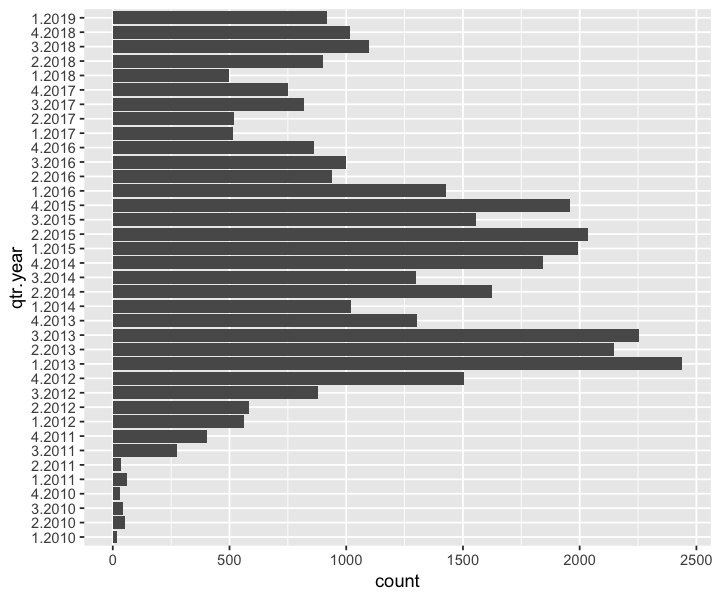

In [18]:
# Solution

### Task #3
Recall that `words` contains common English words. After filtering out these words, and all words that were shorter than six characters, the most common words that the President used in 2018 were:

```
# A tibble: 11 x 2
   words               n
   <chr>           <int>
 1 american          161
 2 border            269
 3 collusion         133
 4 democrats         291
 5 military          183
 6 president         356
 7 realdonaldtrump   182
 8 russia            133
 9 security          151
10 states            150
11 united            150

```

What about for 2012?

In [19]:
# Solution

### Task #4
What were the president's favorite #hashtags in 2018? 2012?

In [20]:
# Your code here

### Task #5
At what hour of the day (or night) is the Donald Trump most likely to tweet, and how has this changed over time?

In [21]:
# Solution

### Task #6
"Sentiment analysis" refers to the act of assigning a label such as "positive" or "negative" to a piece of text. We will perform a simple type of sentiment analysis by assigning a numerical score to certain words in each tweet, using the `sentiments` table:

In [24]:
library(tidytext)
sentiments %>% top_n(5, score)

  word         sentiment lexicon score
1 breathtaking NA        AFINN   5    
2 hurrah       NA        AFINN   5    
3 outstanding  NA        AFINN   5    
4 superb       NA        AFINN   5    
5 thrilled     NA        AFINN   5    

An example of how this works:

In [8]:
trump_sentiments <- trump_tweets2 %>% 
    mutate(
        month = month(dt),
        year = year(dt),
        word = str_extract_all(str_to_lower(text), "\\b\\w+\\b")) %>% 
    unnest %>% inner_join(sentiments) %>% group_by(year, month, id_str, text) %>% 
    summarize(s=sum(score)) %>% ungroup  

Joining, by = "word"


Average the sentiment by month for the full data set, and make a plot of the monthly average from 2014 to 2018. 

President Trump declared his candidacy in June of 2015. Notice anything?

In [25]:
# Solution